In [1]:
import sys
sys.path.insert(0, "..")

In [2]:
import numpy as np
from scipy.optimize import fsolve, minimize
import sympy as sp
import numpy as np
import sys
import warnings
import classes3_rotation_middle_scap as cl3
import matplotlib.pyplot as plt
from importlib import reload
import csv
reload (cl3)

<module 'classes3_rotation_middle_scap' from 'C:\\Users\\zoufaond\\Jupyter\\Passive_SCHR\\classes3_rotation_middle_scap.py'>

In [3]:
model = cl3.SCHR

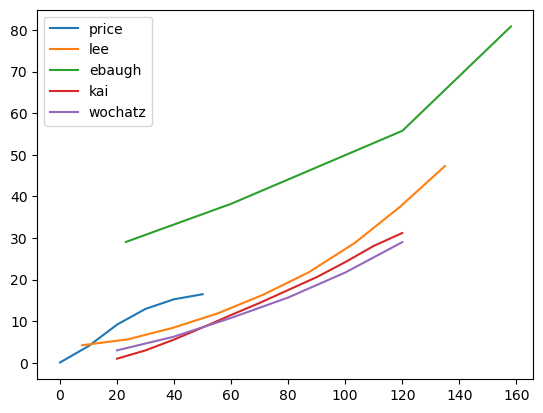

In [4]:
price_hum, price_scap = model.articles_passive(name = 'price_2000')
lee_hum, lee_scap = model.articles_passive(name = 'lee_2020')
eba_hum, eba_scap = model.articles_passive(name = 'ebaugh_2005')
kai_hum, kai_scap = model.articles_passive(name = 'kai_2016')
woc_hum, woc_scap = model.articles_passive(name = 'wochatz_2021')
plt.plot(price_hum,price_scap,label='price')
plt.plot(lee_hum,lee_scap,label='lee')
plt.plot(eba_hum,np.asarray(eba_scap),label='ebaugh')
plt.plot(kai_hum,kai_scap,label='kai')
plt.plot(woc_hum,woc_scap,label='wochatz')
plt.legend()
plt.show()

# Ebaugh 2005
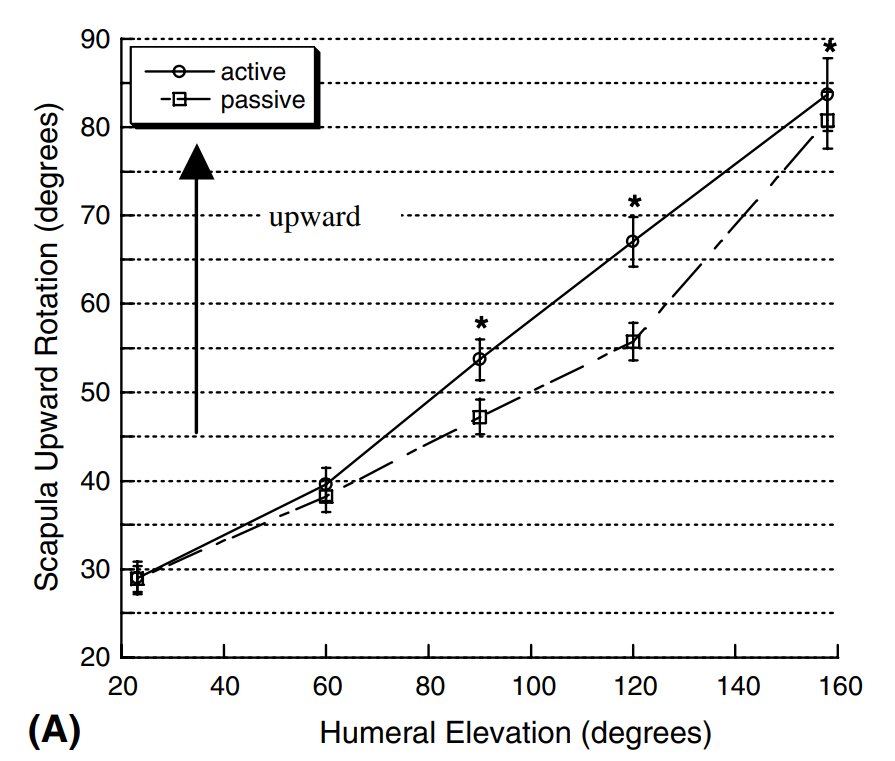

# Lee 2020
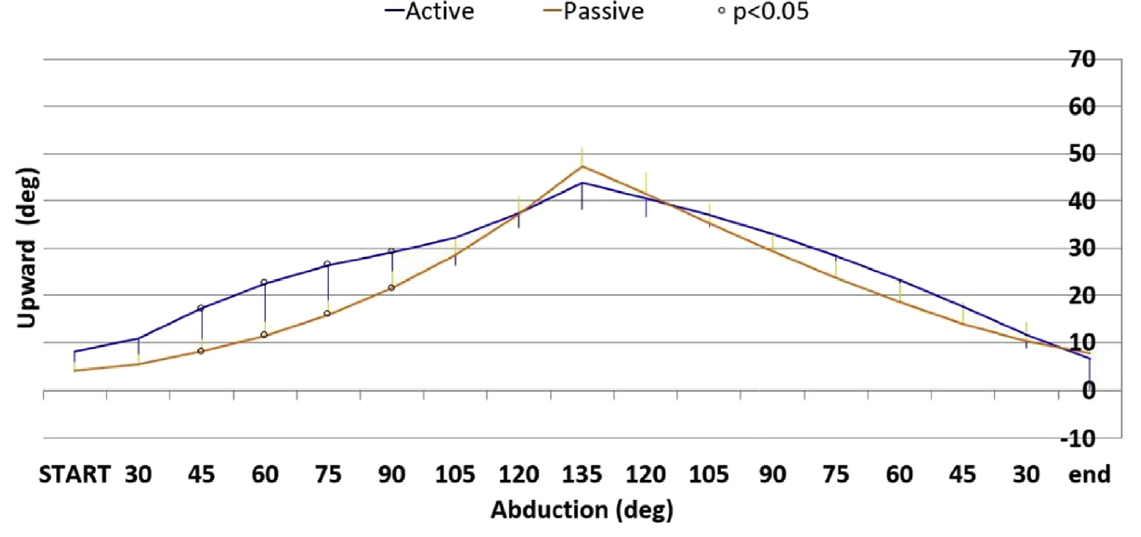

# Price 2000
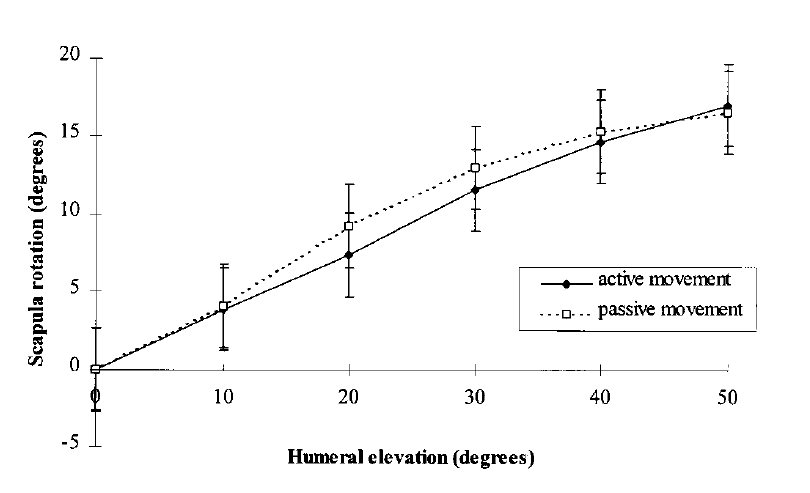

# Wochatz 2021
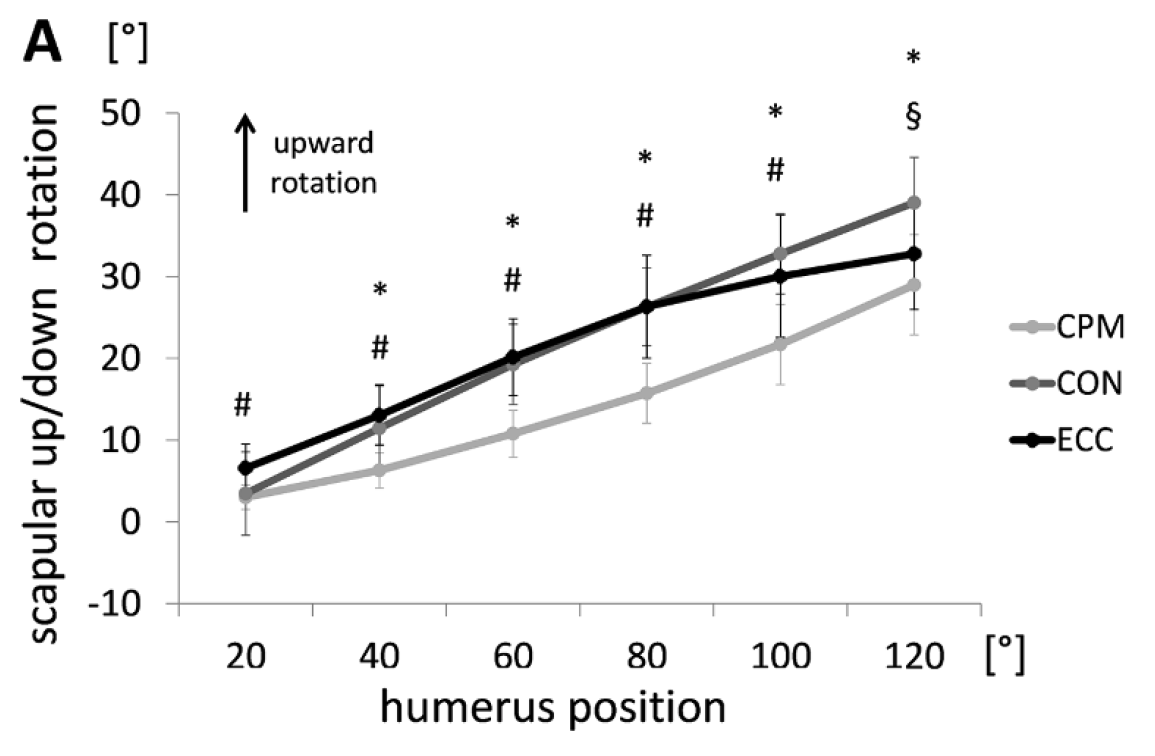

[0.067, -0.0352]
0.0702922470831599
0.08632519910200034


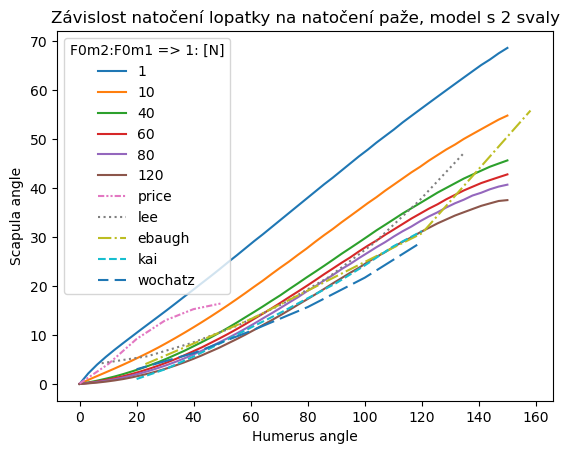

In [5]:
phis,alfa,pomery,x,koefs,koefh,epsm0s,epsm0h = sp.symbols('phis,alfa,pomery,x,koefs,koefh,epsm0s,epsm0h')
model = cl3.SCHR(phis=phis,alfa=alfa,x=x)
t1 = [-0.078,0.084] #[-0.2,-0.3]
s1 = [-0.033,0.03] #[0,-0.2]
s2 = [-0.012,-0.07]  #[0.15,-0.1]
h2 = [-0.008,-0.038] #[0.08,0]
GHcoords = [0.075,0.0028]
Hglob2 = [0.075+h2[0],0.0028+h2[1]]
print(Hglob2)
l01 = np.sqrt((s1[0]-t1[0])**2+(s1[1]-t1[1])**2)
print(l01)
l02 = np.sqrt((Hglob2[0]-s2[0])**2+(Hglob2[1]-s2[1])**2)+0.0
print(l02)

# F_iso = np.array([[1,20,100]])
F_iso = [1,10,40,60,80,120]
# F_iso = np.linspace(1,100,10)
for i,F_iso in enumerate(F_iso):
    model = cl3.SCHR(phis=phis,alfa=alfa,x=x)
    model.add_muscle(l0=l01,F_iso = F_iso,koef = 5,epsm0 = 0.5,scap_ins=s1,thorax_ins=t1, muscle_group = 'ThorScap',muscle_model='Thelen')
    # model.add_muscle(l0=0.68,F_iso = 1,epsm0 = 0.55,scap_ins=s,thorax_ins = t,muscle_group = 'ThorScap')
    model.add_muscle(l0=l02,koef = 7,epsm0 = 0.5,scap_ins=s2,humer_ins=h2,GHjoint = GHcoords,muscle_group = 'ScapHum',muscle_model='Thelen')
    # print(len(model.U_muscles))
    U_celk_np = model.potential_energy()
    phis_opt, alfa_vec = model.scapula_position(U_celk_np)
    plt.plot(alfa_vec*180/np.pi,phis_opt*180/np.pi,label='%s' % round(F_iso,2))
plt.plot(price_hum,price_scap,label='price',linestyle = (0,(3,1,1,1,1,1)))
plt.plot(lee_hum,lee_scap,label='lee',linestyle='dotted')
plt.plot(eba_hum,np.asarray(eba_scap)-25,label='ebaugh',linestyle='dashdot')
plt.plot(kai_hum,kai_scap,label='kai',linestyle='dashed')
plt.plot(woc_hum,woc_scap,label='wochatz',linestyle=(5,(10,3)))
plt.legend(title = 'F0m2:F0m1 => 1: [N]')
plt.xlabel('Humerus angle')
plt.ylabel('Scapula angle')
plt.title("Závislost natočení lopatky na natočení paže, model s 2 svaly")
plt.savefig("2_svaly")
plt.show()